In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
df = pd.read_csv('/content/gld_price_data.csv')
df

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [3]:
df.shape

(2290, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [5]:
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [6]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [7]:
#correlation
correlation = df.corr()

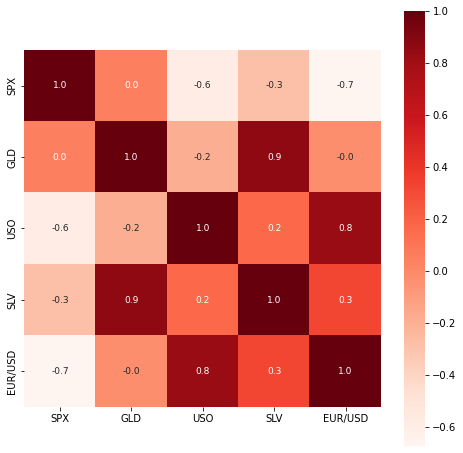

In [9]:
plt.figure(figsize = (8,8))
sns.heatmap(correlation,cbar = True, square = True, fmt='.1f',annot = True , annot_kws ={'size':9}, cmap = 'Reds')

In [10]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


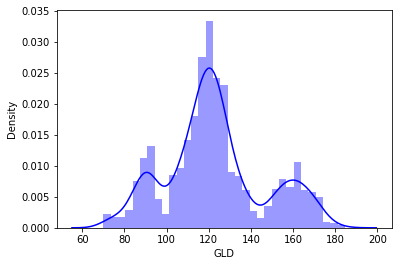

In [11]:
#checking the distribution
sns.distplot(df['GLD'],color = 'blue')

In [12]:
X = df.drop(['Date','GLD'],axis = 1)
Y = df['GLD']

In [13]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [14]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3 ,random_state= 2)

In [21]:
regressor = RandomForestRegressor(n_estimators = 100)

In [22]:
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [23]:
test_pred = regressor.predict(X_test)

In [24]:
print(test_pred)

[168.68799919  82.00710006 115.88620001 127.35380081 120.51510173
 154.78689778 151.03749973 126.10520047 117.9631992  126.09890068
 116.20480054 172.69330077 141.97609945 167.92709896 115.13460023
 117.62920047 138.20710357 169.78410022 159.39930295 160.3338996
 155.06309991 125.31060059 175.12200007 156.76580265 125.07920107
  93.71349925  77.40549939 120.88679986 119.20939997 167.37960076
  88.66719853 125.4346014   91.11000046 117.63079984 121.10669932
 136.34930103 115.45980118 116.64340027 147.74139923 107.15890122
 103.85140141  87.24609801 126.6972001  117.88219885 151.9450992
 119.8105002  108.08750098 108.03039829  93.26219997 127.12759833
  74.73720037 113.62079947 121.0097002  111.1579993  118.92999888
 120.51939968 158.34460046 165.07070165 146.99209717  86.35419991
  94.26469986  86.87799882  90.68740018 118.58340103 126.51710047
 127.74779944 169.66119978 122.16369948 117.15069911  99.71329962
 168.45580168 143.14399806 132.55230233 121.15120204 122.30619981
 119.7980002

In [25]:
error_score = metrics.r2_score(Y_test,test_pred)
print("R squared error :",error_score)

R squared error : 0.9893369497993365


In [26]:
Y_test = list(Y_test)

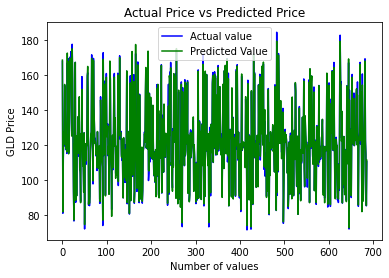

In [27]:
plt.plot(Y_test , color = 'blue' , label = 'Actual value')
plt.plot(test_pred,color = 'green', label = 'Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()